# Proceso de Modelado y Predicción

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
data=datasets.load_iris()
type(data)

sklearn.utils._bunch.Bunch

In [6]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df["especie"]=data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
correlacion=df.corr()
type(cor)

pandas.core.frame.DataFrame

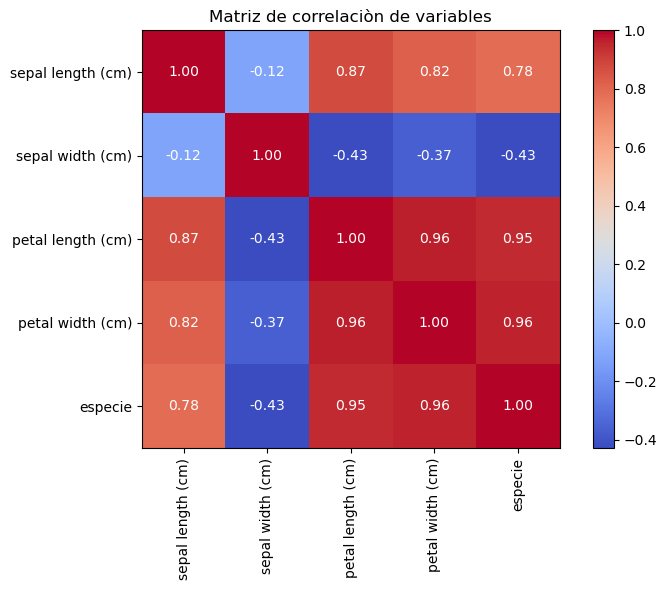

In [10]:
#Grafica para la matrix de correlación
plt.figure(figsize=(8,6))
plt.imshow(correlacion,cmap='coolwarm', interpolation='none')
plt.colorbar()

##etiqueta de los ejes
plt.xticks(np.arange(len(correlacion.columns)),correlacion.columns, rotation=90)
plt.yticks(np.arange(len(correlacion.columns)),correlacion.columns)

for i in range(len(correlacion.columns)):
    for j in range(len(correlacion.columns)):
        plt.text(j,i,f"{correlacion.iloc[i,j]:.2f}",ha="center",va="center", color="white")

plt.title("Matriz de correlaciòn de variables")
plt.tight_layout()
plt.show()

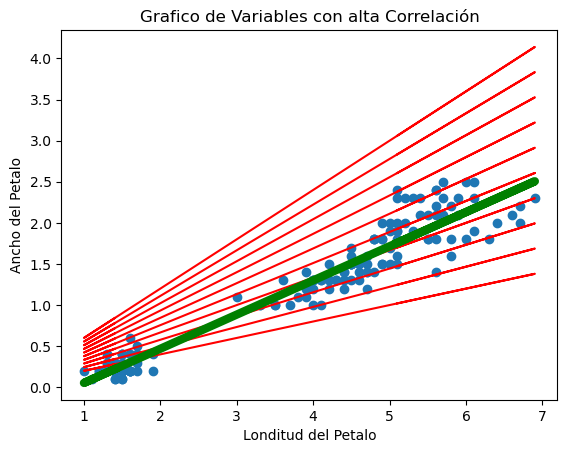

In [147]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

#Graficar una linea recta.
m=np.linspace(0.2,0.6,10)

for i in m:
    plt.plot(df["petal length (cm)"],i*df["petal length (cm)"],color="r")


plt.plot(df["petal length (cm)"],0.41575542*df["petal length (cm)"]-0.36307552,color="g", linewidth=6)


plt.title("Grafico de Variables con alta Correlación")
plt.xlabel("Londitud del Petalo")
plt.ylabel("Ancho del Petalo")
plt.show()

In [148]:
y_real=df["petal width (cm)"]
x=df["petal length (cm)"]

def RMSE_withb(x,y_real,m,b):
    rmse=0
    predicciones=[]
    yreal=[]
    RMSE=[]
    for dato in x:
        y_pred=(m*dato)+b
        predicciones.append(y_pred)
    for i in y_real:
        yreal.append(i)
    for k in range(0,149,1):
        RMSE.append((predicciones[k]-yreal[k])**2)
    for k in range(0,149,1):
        rmse=rmse+RMSE[k];
    rmse=rmse/150
    rmse=np.sqrt(rmse)
    return rmse

In [149]:
# Aqui se determina el rango de m y b
mlist=np.linspace(0.2,0.6,100)
blist=np.linspace(-0.4,0.4,100)
minimo=[[],[],[]]
#contador_a=0
#contador_b=0
for i in mlist:
    for j in blist:
        #contador_b = 1 + contador_b
        #print(contador_b)
        #print(RMSE_withb(x,y_real,i,j))
        #print("Con pendiente:", i)
        #print("Con desviación:", j)
        #print("")
        minimo[0].append(RMSE_withb(x,y_real,i,j))
        minimo[1].append(i)
        minimo[2].append(j)
#print(minimo.index(min(minimo[0])))
valor_minimo = min(minimo[0])
indice_minimo= minimo[0].index(valor_minimo)
#print(valor_minimo)
#print(indice_minimo)

print("----------------------------------")
print("La recta que mejor se aproxima es:")
print("Pendiente: ", minimo[1][indice_minimo])
print("Punto de corte: ", minimo[2][indice_minimo])
print("RMSE: ", valor_minimo)
print("----------------------------------")


----------------------------------
La recta que mejor se aproxima es:
Pendiente:  0.41414141414141414
Punto de corte:  -0.35959595959595964
RMSE:  0.20510249626985258
----------------------------------


# Mejor Linea Recta Usando Librerias Especializadas "scikit-learn"

In [150]:
from sklearn import linear_model # Importar el modelo lineal para encontrar la mejor recta (optimo m y optimo b)

In [151]:
x1=df["petal length (cm)"]
y1=df["petal width (cm)"]
x1=x1.values.reshape(-1,1)
y1=y1.values.reshape(-1,1)
mejor_recta = linear_model.LinearRegression()
mejor_recta.fit(x1,y1)
print(mejor_recta.coef_,mejor_recta.intercept_)

[[0.41575542]] [-0.36307552]
